In [77]:
import sys

sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh
from scipy.linalg import eigh
import src.fem_1d_eigen
import importlib

importlib.reload(src.fem_1d_eigen)
from src.fem_1d_eigen import *

In [78]:
xs = np.linspace(0, 1, 500)
v = np.zeros_like(xs)
dirichlet_bc = np.array([0, 0])
femeig = Fem1dEigen(xs, v, dirichlet_bc)
K = femeig.get_K()
M = femeig.get_M()
val, vec = eigsh(K, k=3, M=M, which="LA", sigma=0)

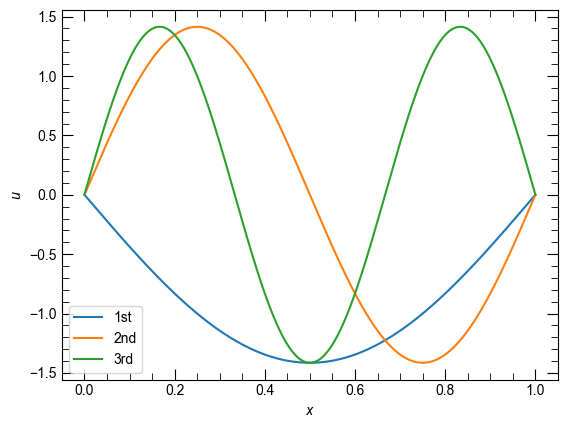

In [88]:
fig, ax = plt.subplots()
ax.plot(xs, vec[:, 0], label="1st")
ax.plot(xs, vec[:, 1], label="2nd")
ax.plot(xs, vec[:, 2], label="3rd")
ax.legend()
ax.set_xlabel("$x$")
ax.set_ylabel("$u$")
fig.savefig("eigenfunction.pdf")

In [96]:
vals = []
irange = range(10, 2500, 20)
for i in irange:
    print(i)
    xs = np.linspace(0, 1, i)
    v = np.zeros_like(xs)
    dirichlet_bc = np.array([0, 0])
    femeig = Fem1dEigen(xs, v, dirichlet_bc)
    K = femeig.get_K()
    M = 2 * femeig.get_M()
    val, vec = eigsh(K, k=1, M=M, which="LM", sigma=0)
    vals.append(val)

10
30
50
70
90
110
130
150
170
190
210
230
250
270
290
310
330
350
370
390
410
430
450
470
490
510
530
550
570
590
610
630
650
670
690
710
730
750
770
790
810
830
850
870
890
910
930
950
970
990
1010
1030
1050
1070
1090
1110
1130
1150
1170
1190
1210
1230
1250
1270
1290
1310
1330
1350
1370
1390
1410
1430
1450
1470
1490
1510
1530
1550
1570
1590
1610
1630
1650
1670
1690
1710
1730
1750
1770
1790
1810
1830
1850
1870
1890
1910
1930
1950
1970
1990
2010
2030
2050
2070
2090
2110
2130
2150
2170
2190
2210
2230
2250
2270
2290
2310
2330
2350
2370
2390
2410
2430
2450
2470
2490


[-1.3274221e-07]


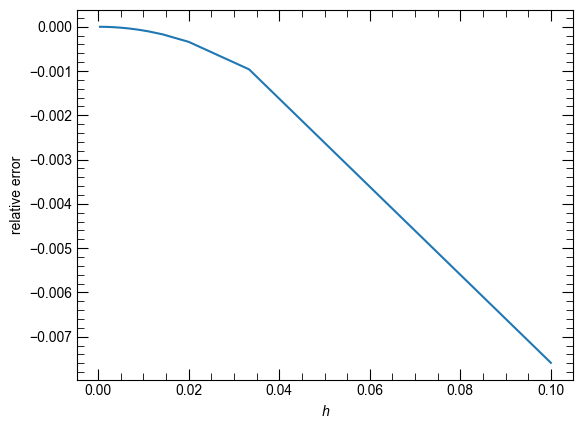

In [97]:
fig, ax = plt.subplots()
ax.plot(1 / np.array(irange), (0.5 * np.pi**2 - np.array(vals)) / (0.5 * np.pi**2))
# ax.plot(irange, 1 / np.array(irange) ** 2, label="1/x^2")
# ax.set_ylim(bottom=0)
# ax.set_yscale("log")
ax.set_xlabel("$h$")
ax.set_ylabel("relative error")
print((0.5 * np.pi**2 - vals[-1]) / (0.5 * np.pi**2))
fig.savefig("convergence.pdf")

In [ ]:
np.pi**2

9.869604401089358